In [1]:
from seq2sec.apply import Protein
from seq2sec.model import load
import torch

In [2]:
# load model and set to eval
net = load('./models/resnet_mt_3-4_cath95.pth') 
# net = net.to()

/home/jgcarvalho/anaconda3/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'seq2sec.model.ResNet2' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/jgcarvalho/anaconda3/lib/python3.7/site-packages/torch/cuda/__init__.py:117: UserWarning: 
    Found GPU0 GeForce GTX 650 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


In [17]:
# read fasta
# x = torch.randn((1,22,10))
p = Protein("./fasta_sequences/start2fold/P0A7Y4.fasta")
p.predict_with(net.predict)
print(p.seq)
print(p.prediction)
print(p.probabilities)
print(p.steps)

MLKQVEIFTDGSCLGNPGPGGYGAILRYRGREKTFSAGYTRTTNNRMELMAAIVALEALKEHCEVILSTDSQYVRQGITQWIHNWKKRGWKTADKKPVKNVDLWQRLDAALGQHQIKWEWVKGHAGHPENERCDELARAAAMNPTLEDTGYQVEV
{'ss_cons_3_label': 'CCCEEEEECCCCCCCCCCCCCCCEEEEEECCCCEEEECCCCCCCCHHHHHHHHHHHHHHHHCCEEEEECCCHHHHHHHHHHHHHHHHHCCCCCCCCCCCCHHHHHHHHHHHHCCCCEEEEEECCCCCCCCHHHHHHHHHHHHCCCCCCCCCEEEC', 'ss_cons_4_label': 'CCCEEEEEETTEEEECCCTTTTEEEEEEETTEEEEEEEEEEEHHHHHHHHHHHHHHHHHHHTEEEEEEECHHHHHHHHHHHHHHHHHHHCCTTTCCCCCHHHHHHHHHHHHHHHCEEEEEEECTTTCHHHHHHHHHHHHHHHCTTTTTCCEEEEC'}
{'ss_cons_3_label': array([[1.63886187e-04, 1.70929663e-04, 9.99665141e-01],
       [9.14246216e-03, 1.38240829e-01, 8.52616727e-01],
       [7.86045194e-03, 3.23470086e-01, 6.68669462e-01],
       [6.08060183e-03, 7.52839565e-01, 2.41079852e-01],
       [6.17920514e-03, 8.97157371e-01, 9.66633633e-02],
       [6.82144938e-03, 9.49104309e-01, 4.40742895e-02],
       [5.09024318e-03, 9.66975152e-01, 2.79345997e-02],
       [6.36319630e-03, 8.76309931e-01, 1.17326818e-01],
       [5.0

In [3]:
# read fasta
# x = torch.randn((1,22,10))
p = Protein("./fasta_sequences/start2fold/STF0001.fasta")
p.predict_with(net.predict)
print(p.seq)
print(p.prediction)
print(p.probabilities)
print(p.steps)

MSQAEFDKAAEEVKHLKTKPADEEMLFIYSHYKQATVGDINTERPGMLDFKGKAKWDAWNELKGTSKEDAMKAYIDKVEELKKKYGI
{'ss_cons_3_label': 'CCHHHHHHHHHHHHHHHCCCCCHHHHHHHHHHHHCCCCCCCCCCCCCCCCCCHHHHHHHHHHCCCCHHHHHHHHHHHHHHHHHHHCC', 'ss_cons_4_label': 'CCHHHHHHHHHHHHHHHHCTHHHHHHHHHHHHHHHCCTCTTTCCTTEECHHHHHHHHHHHHHHCCCHHHHHHHHHHHHHHHHHHHCC'}
{'ss_cons_3_label': array([[4.33503976e-03, 2.72389279e-05, 9.95637715e-01],
       [4.58566472e-02, 5.55598293e-04, 9.53587830e-01],
       [7.83198178e-01, 8.40929453e-04, 2.15960860e-01],
       [8.97896528e-01, 9.31090850e-04, 1.01172388e-01],
       [9.34789777e-01, 9.18170786e-04, 6.42921478e-02],
       [9.52485800e-01, 5.32736361e-04, 4.69814166e-02],
       [9.61649597e-01, 3.70093971e-04, 3.79803330e-02],
       [9.69688237e-01, 2.17635781e-04, 3.00941188e-02],
       [9.72926676e-01, 2.20481103e-04, 2.68528629e-02],
       [9.80562687e-01, 2.14050000e-04, 1.92232542e-02],
       [9.77029026e-01, 3.78767698e-04, 2.25922577e-02],
       [9.74640489e-01, 1.06923527e-03, 2.42

In [18]:
p.seq

'MLKQVEIFTDGSCLGNPGPGGYGAILRYRGREKTFSAGYTRTTNNRMELMAAIVALEALKEHCEVILSTDSQYVRQGITQWIHNWKKRGWKTADKKPVKNVDLWQRLDAALGQHQIKWEWVKGHAGHPENERCDELARAAAMNPTLEDTGYQVEV'

In [19]:
p.prediction

{'ss_cons_3_label': 'CCCEEEEECCCCCCCCCCCCCCCEEEEEECCCCEEEECCCCCCCCHHHHHHHHHHHHHHHHCCEEEEECCCHHHHHHHHHHHHHHHHHCCCCCCCCCCCCHHHHHHHHHHHHCCCCEEEEEECCCCCCCCHHHHHHHHHHHHCCCCCCCCCEEEC',
 'ss_cons_4_label': 'CCCEEEEEETTEEEECCCTTTTEEEEEEETTEEEEEEEEEEEHHHHHHHHHHHHHHHHHHHTEEEEEEECHHHHHHHHHHHHHHHHHHHCCTTTCCCCCHHHHHHHHHHHHHHHCEEEEEEECTTTCHHHHHHHHHHHHHHHCTTTTTCCEEEEC'}

In [4]:
p.iplot_probabilities()

TypeError: unhashable type: 'slice'

In [5]:
def plotSteps(p):
    from plotly import tools
    import plotly.graph_objs as go
    from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
    import numpy as np
    init_notebook_mode(connected=True)
    
    seq = list(p.seq)
    x = [i for i in range(0, len(p.seq))]
    
    h_h = go.Heatmap(
        z=p.steps['ss_cons_3_label'][0],
        transpose=True,
    )
    h_e = go.Heatmap(
        z=p.steps['ss_cons_3_label'][1],
        transpose=True,
    )
    h_c = go.Heatmap(
        z=p.steps['ss_cons_3_label'][2],
        transpose=True,
    )
#     data=[h_h, h_e]
    layout = go.Layout(
#         barmode='overlay', 
        yaxis=dict(
            autorange='reversed',
            domain=[0,0.32],
        ),
        yaxis2=dict(
            autorange='reversed',
            domain=[0.34,0.66],
        ),
        yaxis3=dict(
            autorange='reversed',
            domain=[0.68,1.0],
        ),
        xaxis=dict(
            ticktext=seq,
            tickvals=x,
            tickmode='array',
            tickangle=0,
            tickfont=dict(
                family='Courier, mono',
                color='black'
            ),
# #             tickmode='linear',
            ticks='outside',
# #             tick0=0,
# #             dtick=10,
#             ticklen=2,
# #             tickwidth=4,
# #             tickcolor='#000'
#             hoverformat=''
        ),
        xaxis2=dict(
            ticktext=seq,
            tickvals=x,
            tickmode='array',
            tickangle=0,
            tickfont=dict(
                family='Courier, mono',
                color='black'
            ),
# #             tickmode='linear',
            ticks='outside',
# #             tick0=0,
# #             dtick=10,
#             ticklen=2,
# #             tickwidth=4,
# #             tickcolor='#000'
#             hoverformat=''
        ),
        xaxis3=dict(
            ticktext=seq,
            tickvals=x,
            tickmode='array',
            tickangle=0,
            tickfont=dict(
                family='Courier, mono',
                color='black'
            ),
# #             tickmode='linear',
            ticks='outside',
# #             tick0=0,
# #             dtick=10,
#             ticklen=2,
# #             tickwidth=4,
# #             tickcolor='#000'
#             hoverformat=''
        ),
        
    )
    
    fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.01)
    fig.append_trace(h_h, 1, 1)
    fig.append_trace(h_e, 2, 1)
    fig.append_trace(h_c, 3, 1)
#     fig.append_trace(trace1, 3, 1)


#     fig['layout'].update(height=600, width=600, title='Stacked subplots')
    fig['layout'] = layout
#     fig = go.Figure(data=data, layout=layout )
    
    iplot(fig)
    

In [20]:
plotSteps(p)

This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]
[ (3,1) x3,y3 ]



In [12]:
p.steps['ss_cons_3_label'][0][:,20]

array([0.23716398, 0.10841147, 0.2107996 , 0.12857886, 0.16775976,
       0.3123551 , 0.07735174, 0.23319612, 0.22729635, 0.16442584,
       0.1429912 , 0.21303868, 0.27002966, 0.31108966, 0.26596484,
       0.30949667, 0.27154553, 0.09721595, 0.28123236, 0.06398264,
       0.19606254, 0.0948875 , 0.2037258 , 0.19744948, 0.29434106,
       0.36174473, 0.24966061, 0.30180347, 0.29602608, 0.13008559,
       0.22274362, 0.34404182, 0.2351958 , 0.16952984, 0.17849392,
       0.11993584, 0.18818697, 0.01687182, 0.10230442, 0.39141643,
       0.12305558, 0.16562074, 0.1711753 , 0.2675541 , 0.03065849,
       0.01289871, 0.32850927, 0.24675138, 0.10912488, 0.27861628,
       0.3284833 , 0.01269467, 0.25834313, 0.13857456, 0.2758557 ,
       0.3767395 , 0.08182874, 0.26188743, 0.37982792, 0.06796323,
       0.23378097, 0.27468374, 0.29821777, 0.01071841, 0.15809317,
       0.17184336, 0.23513928, 0.16706112, 0.09231572, 0.25623915,
       0.20347582, 0.24556567, 0.23418804, 0.34358287, 0.38465

In [7]:
p.probabilities.argmax(axis=1)

AttributeError: 'dict' object has no attribute 'argmax'

In [7]:
c = ['H', 'E', 'C', 'T']

In [8]:
a = ''.join([c[i] for i in p.probabilities.argmax(axis=1)])

In [30]:
def plotProtein(p):
    import plotly.graph_objs as go
    from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
    init_notebook_mode(connected=True)
    seq = list(p.seq)
    x = [i for i in range(0, len(p.seq))]
    y0 = p.probabilities['ss_cons_3_label'][:,0]
    y1 = p.probabilities['ss_cons_3_label'][:,1]
    y2 = p.probabilities['ss_cons_3_label'][:,2]
    
#     p_h = go.Bar(x=x, y=y0, opacity=0.4, name='Helix', marker=dict(color='#ff0000'))
#     p_e = go.Bar(x=x, y=y1, opacity=0.4, name='Strand', marker=dict(color='#0000ff'))
#     p_c = go.Bar(x=x, y=y2, opacity=0.4, name='Coil', marker=dict(color='#00ff00'))
    p_h = go.Bar(x=x, y=y0, opacity=0.4, name='Helix')
    p_e = go.Bar(x=x, y=y1, opacity=0.4, name='Strand')
    p_c = go.Bar(x=x, y=y2, opacity=0.4, name='Coil')
#     p_h = go.Scatter(x=x, y=y0, name='Helix', line=dict(shape='hvh'))
#     p_e = go.Scatter(x=x, y=y1, name='Strand', line=dict(shape='hvh'))
#     p_c = go.Scatter(x=x, y=y2, name='Coil', line=dict(shape='hvh'))

    data = [p_h, p_e, p_c]
    layout = go.Layout(
        barmode='overlay', 
        yaxis=dict(
            range=[0, 1],
            hoverformat = '%'
        ),
        xaxis=go.layout.XAxis(
            ticktext=seq,
            tickvals=x,
            tickangle=0,
            tickfont=dict(
                family='Courier, mono',
#                 size=14,
                color='black'
            ),
#             tickmode='linear',
            ticks='outside',
#             tick0=0,
#             dtick=10,
            ticklen=2,
#             tickwidth=4,
#             tickcolor='#000'
            hoverformat=''
        ),
        
    )
    fig = go.Figure(data=data, layout=layout )

    iplot(fig)

In [31]:
plotProtein(p)

In [19]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
np.transpose(a)

array([[1, 4],
       [2, 5],
       [3, 6]])

In [66]:
y0

array([0.4302736 , 0.3180745 , 0.30054185, 0.39843312, 0.45694488,
       0.25393966, 0.19920745, 0.33606824, 0.34388864, 0.39976448,
       0.34292206, 0.3793463 , 0.16024141, 0.30642807, 0.17845395,
       0.36756092, 0.2428527 , 0.2898406 , 0.44164738, 0.29244712,
       0.44929945, 0.2277653 , 0.36142862, 0.32388082, 0.3006929 ,
       0.505192  , 0.4143288 , 0.4658861 , 0.28358227, 0.21818371,
       0.23234174, 0.43095124, 0.39521116, 0.31217664, 0.2863902 ,
       0.44131234, 0.20594773, 0.45858154, 0.1984589 , 0.41480327,
       0.16822818, 0.3554259 , 0.33215028, 0.37374187, 0.2954107 ,
       0.33928064, 0.28091833, 0.30483776, 0.20751314, 0.37004045,
       0.32972473, 0.39464682, 0.31311917, 0.35349178, 0.3789755 ,
       0.34229946, 0.21572892, 0.3836076 , 0.28932002, 0.13143086,
       0.40416855, 0.27472433, 0.30385584, 0.26508173, 0.33453926,
       0.18736053, 0.20757875, 0.4401486 , 0.2248325 , 0.34455812,
       0.36026525, 0.28218535, 0.5131529 , 0.43157753, 0.34815

In [67]:
seq

['M',
 'S',
 'Q',
 'A',
 'E',
 'F',
 'D',
 'K',
 'A',
 'A',
 'E',
 'E',
 'V',
 'K',
 'H',
 'L',
 'K',
 'T',
 'K',
 'P',
 'A',
 'D',
 'E',
 'E',
 'M',
 'L',
 'F',
 'I',
 'Y',
 'S',
 'H',
 'Y',
 'K',
 'Q',
 'A',
 'T',
 'V',
 'G',
 'D',
 'I',
 'N',
 'T',
 'E',
 'R',
 'P',
 'G',
 'M',
 'L',
 'D',
 'F',
 'K',
 'G',
 'K',
 'A',
 'K',
 'W',
 'D',
 'A',
 'W',
 'N',
 'E',
 'L',
 'K',
 'G',
 'T',
 'S',
 'K',
 'E',
 'D',
 'A',
 'M',
 'K',
 'A',
 'Y',
 'I',
 'D',
 'K',
 'V',
 'E',
 'E',
 'L',
 'K',
 'K',
 'K',
 'Y',
 'G',
 'I']

In [10]:
import pandas as pd
d = pd.DataFrame(p.probabilities, columns=['H', 'E', 'C', 'T'])
d.index = d.index + 1
d['AA'] = list(p.seq)
d['num'] = range(1,len(p.seq) + 1)

In [11]:
d

,H,E,C,T,AA,num
1,0.430274,0.147208,0.306327,0.116191,M,1
2,0.318074,0.228698,0.253737,0.199491,S,2
3,0.300542,0.185744,0.450715,0.062999,Q,3
4,0.398433,0.180204,0.243341,0.178022,A,4
5,0.456945,0.098829,0.227680,0.216546,E,5
6,0.253940,0.291379,0.273803,0.180878,F,6
7,0.199207,0.420215,0.196364,0.184214,D,7
8,0.336068,0.343002,0.191461,0.129468,K,8
9,0.343889,0.186373,0.216229,0.253509,A,9
10,0.399764,0.170464,0.223825,0.205946,A,10


In [12]:
long = d.melt(id_vars=['AA','num'], value_vars=['H', 'E', 'C','T'])

In [13]:
long

,AA,num,variable,value
0,M,1,H,0.430274
1,S,2,H,0.318074
2,Q,3,H,0.300542
3,A,4,H,0.398433
4,E,5,H,0.456945
5,F,6,H,0.253940
6,D,7,H,0.199207
7,K,8,H,0.336068
8,A,9,H,0.343889
9,A,10,H,0.399764


In [22]:
import altair as alt

# to use with Jupyter notebook (not JupyterLab) run the following
# alt.renderers.enable('notebook')

alt.Chart(long).mark_line().encode(
    x=alt.X('num',type=),
    y='value',
    color='variable'
).interactive()

SchemaValidationError: Invalid specification

        altair.vegalite.v2.schema.channels.X, validating 'additionalProperties'

        Additional properties are not allowed ('value' was unexpected)
        

Chart({
  data:     AA  num variable     value
  0    M    1        H  0.430274
  1    S    2        H  0.318074
  2    Q    3        H  0.300542
  3    A    4        H  0.398433
  4    E    5        H  0.456945
  5    F    6        H  0.253940
  6    D    7        H  0.199207
  7    K    8        H  0.336068
  8    A    9        H  0.343889
  9    A   10        H  0.399764
  10   E   11        H  0.342922
  11   E   12        H  0.379346
  12   V   13        H  0.160241
  13   K   14        H  0.306428
  14   H   15        H  0.178454
  15   L   16        H  0.367561
  16   K   17        H  0.242853
  17   T   18        H  0.289841
  18   K   19        H  0.441647
  19   P   20        H  0.292447
  20   A   21        H  0.449299
  21   D   22        H  0.227765
  22   E   23        H  0.361429
  23   E   24        H  0.323881
  24   M   25        H  0.300693
  25   L   26        H  0.505192
  26   F   27        H  0.414329
  27   I   28        H  0.465886
  28   Y   29        H  0.283

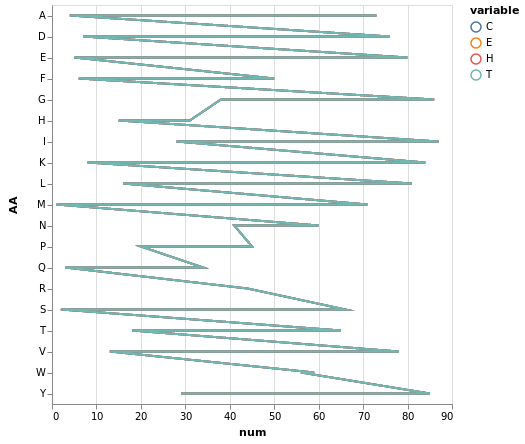

In [19]:
alt.Chart(long).mark_line().encode(
    x='num',
    y='AA',
    color='variable'
).interactive()

In [20]:
alt.Axis()

Axis({
  
})